In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from operator import indexOf  

In [2]:

class Shape:
    #Constructor for Shape class
    def __init__(self, Plane):
        self.Plane = Plane
    # Draw Function to Draw the shape with Given Axis    
    def Draw(self,Axis):
        coord = Axis
        coord.append(coord[0])
        xs, ys = zip(*coord)
        plt.figure()
        plt.plot(xs,ys) 
        plt.show()
    def Generate_Random_Axis(self):
        randomlist = []
        for i in range(0,500):
            n =[ random.randint(1,self.Plane) for _ in range(2)]
            randomlist.append(n)
        return randomlist
    

In [3]:
class Binary:
    string = [] # Global variable to get Binary Number of Decimal...
    def _init__(self,num):
        self.num = num
    #Decimal to Binary Conversion....    
    def Decimal_to_Binary(self,num):
        obj = Binary()
        if num >= 1:
            obj.Decimal_to_Binary(num // 2)
            string.append(num % 2 )
    def set_significant_Zeros(self,Number):
        #print(Number)
        string = ""
        list_of_zero = ["000000","00000","0000","000","00","0"]
        if(len(Number)<7):
            string += list_of_zero[len(Number)-1] + str(Number)
            return string
        else:
            return str(Number)        

In [4]:
class Genetic_Algorithm:
    Chromosomes = []
    Childrens_Chromo = []
    Fitness_Value = {}
    n = 0
    def Make_Chromosomes(self,temp):
        obj = Binary()
        small_list = []
        for i in temp:
            small_list.append(obj.set_significant_Zeros(i))
        concat_list = []
        point = [0,2,4,6,8]
        for i in point:
            concat_list.append(small_list[i] + small_list[i+1])
        self.Chromosomes.append(concat_list)  
    def CrossProduct(self,A):
        X1 = (A[1][0] - A[0][0])
        Y1 = (A[1][1] - A[0][1])
        X2 = (A[2][0] - A[0][0])
        Y2 = (A[2][1] - A[0][1])
        return (X1 * Y2 - Y1 * X2)
    # Function to check if the polygon is convex polygon or not
    def isConvex(self,points):
        # Stores count of edges in polygon
        N = len(points)
        prev = 0
        curr = 0
        # Traverse the array
        for i in range(N):    
            # Stores three adjacent edges
            # of the polygon
            temp = [points[i], points[(i + 1) % N],
                               points[(i + 2) % N]]
            # Update curr
            Obj = Genetic_Algorithm()
            curr = Obj.CrossProduct(temp)
            # If curr is not equal to 0
            if (curr != 0):
                # If direction of cross product of
                # all adjacent edges are not same
                if (curr * prev < 0):
                    return False
                else:

                    # Update curr
                    prev = curr
        return True
    def Check_Intersection(self,Chromo):
        from shapely.wkt import loads
        from shapely.validation import explain_validity
        from shapely.geometry.polygon import LinearRing
        n = Chromo
        string1 = ""
        count  = 2
        for i in n:
            for j in i:
                if(count == -1):
                    count = 2
                if count == 2:
                    string1 += str(j)
                if count == 1:
                    string1 += " "
                if count == 0:
                    string1 += str(j) + ','
                count -= 1    
        string_path = 'LINESTRING ('+ string1 + ')'
        leng = len(string_path)
        replaced = string_path.replace(',)', ')')
        print(replaced)
        l = loads(replaced)
        ring = LinearRing(list(l.coords))
        #print(ring.is_simple) 
        #print(explain_validity(ring))
        return ring.is_simple
    def CrossOver(self,Chromosome1,Chromosome2):
        Children = []
        temp1 = Chromosome1[0]
        temp2 = Chromosome2[1]
        Chromosome1[0] = temp2
        Chromosome2[1] = temp1

        temp1 = Chromosome1[1]
        temp2 = Chromosome2[0]
        Chromosome1[1] = temp2
        Chromosome2[0] = temp1


        temp1 = Chromosome1[3]
        temp2 = Chromosome2[4]
        Chromosome1[3] = temp2
        Chromosome2[4] = temp1

        temp1 = Chromosome1[4]
        temp2 = Chromosome2[3]
        Chromosome1[4] = temp2
        Chromosome2[3] = temp1

        Children.append(Chromosome1)
        Children.append(Chromosome2)
        self.Childrens_Chromo.append(Children)
        self.Chromosomes.extend(Children)
    def Get_Chromosomes(self):
        return self.Chromosomes
    def Get_CC(self):
        return self.Childrens_Chromo
    def Mutation(self,Chromo):
        Bit_Number = random.randint(0,14)
        Part_Number = random.randint(0,5)           
    def Fitness_Function(self,Chromo):
        Fitness = 0
        obj = Genetic_Algorithm()
        if obj.isConvex(Chromo) == True:
            Fitness += random.uniform(0.0,0.3)
        elif obj.isConvex(Chromo) == False:
            Fitness += random.uniform(0.43,0.98)
        if obj.Check_Intersection(Chromo) == True:
            Fitness += random.uniform(4.9,6.9)
        elif obj.Check_Intersection(Chromo) == False:    
            Fitness += random.uniform(11.43,15.98)
            
        self.Fitness_Value[self.n] = Fitness
        self.n+=1
    def Get_Fitness(self):
        sort_orders = sorted(self.Fitness_Value.items(), key=lambda x: x[1])
        return sort_orders
        
        
        

In [5]:
print("Plane Size for Drawing Polygon is 64")
Random_Axis = []
S = Shape(64)
Random_Axis = S.Generate_Random_Axis()
print("Random points for Polygon \n",Random_Axis)


Plane Size for Drawing Polygon is 64
Random points for Polygon 
 [[13, 58], [37, 6], [63, 33], [13, 30], [56, 53], [51, 15], [19, 15], [35, 26], [10, 51], [42, 4], [25, 60], [60, 3], [41, 59], [48, 37], [12, 24], [21, 35], [28, 61], [5, 38], [39, 25], [37, 39], [51, 59], [61, 29], [11, 46], [2, 31], [22, 13], [28, 17], [5, 18], [41, 5], [22, 5], [2, 58], [37, 12], [35, 32], [19, 4], [10, 19], [61, 4], [12, 59], [50, 38], [49, 9], [13, 52], [17, 17], [20, 61], [61, 29], [61, 18], [4, 48], [3, 35], [31, 38], [27, 50], [13, 36], [23, 13], [48, 9], [55, 5], [51, 49], [52, 12], [60, 21], [47, 32], [34, 37], [43, 45], [16, 63], [24, 12], [20, 56], [60, 56], [47, 13], [61, 10], [36, 37], [39, 12], [30, 34], [47, 42], [53, 28], [37, 30], [6, 14], [11, 27], [29, 25], [45, 35], [61, 26], [59, 41], [51, 43], [4, 21], [19, 46], [44, 47], [47, 8], [27, 5], [54, 18], [14, 3], [37, 44], [32, 63], [31, 8], [39, 63], [39, 54], [36, 51], [40, 28], [28, 31], [46, 63], [8, 38], [29, 50], [47, 14], [21, 12

[[13, 58], [37, 6], [63, 33], [13, 30], [56, 53]]


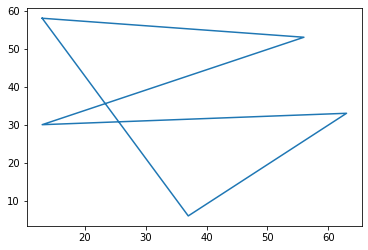

[[51, 15], [19, 15], [35, 26], [10, 51], [42, 4]]


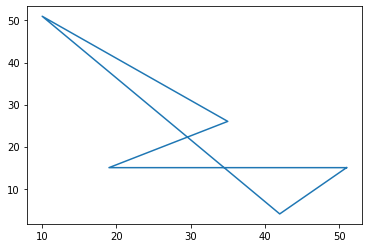

[[25, 60], [60, 3], [41, 59], [48, 37], [12, 24]]


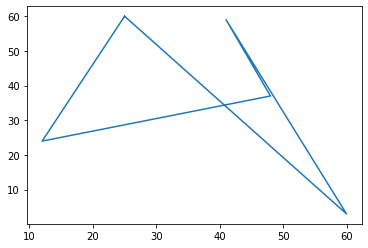

[[21, 35], [28, 61], [5, 38], [39, 25], [37, 39]]


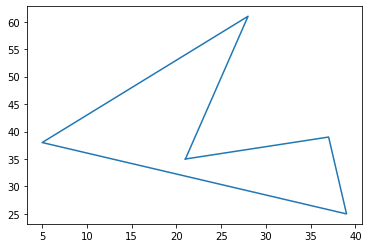

[[51, 59], [61, 29], [11, 46], [2, 31], [22, 13]]


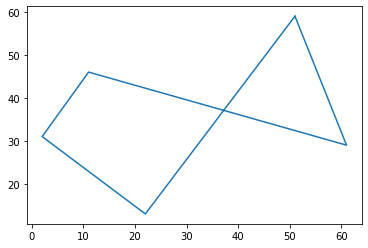

[[28, 17], [5, 18], [41, 5], [22, 5], [2, 58]]


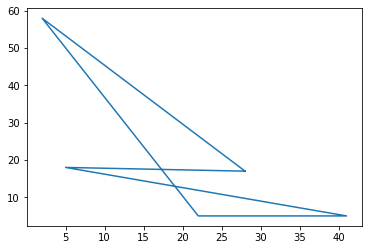

[[37, 12], [35, 32], [19, 4], [10, 19], [61, 4]]


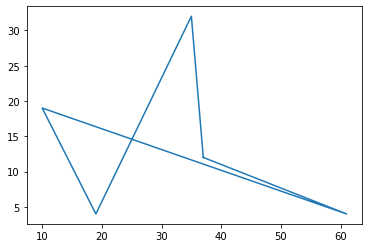

[[12, 59], [50, 38], [49, 9], [13, 52], [17, 17]]


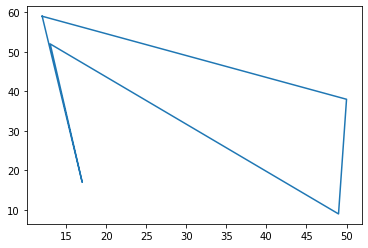

[[20, 61], [61, 29], [61, 18], [4, 48], [3, 35]]


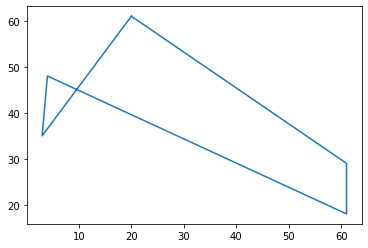

[[31, 38], [27, 50], [13, 36], [23, 13], [48, 9]]


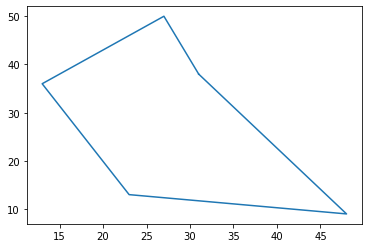

[[55, 5], [51, 49], [52, 12], [60, 21], [47, 32]]


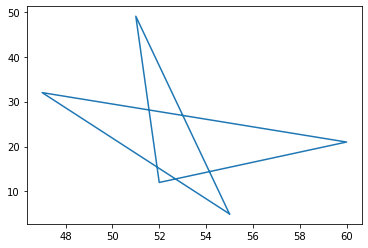

[[34, 37], [43, 45], [16, 63], [24, 12], [20, 56]]


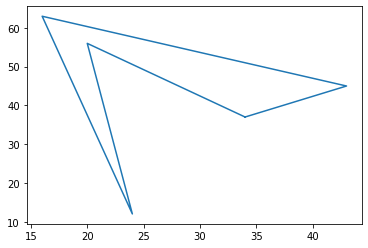

[[60, 56], [47, 13], [61, 10], [36, 37], [39, 12]]


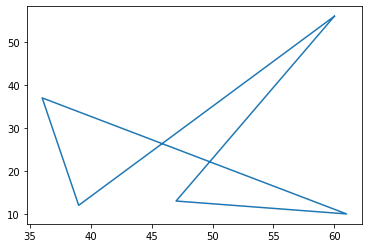

[[30, 34], [47, 42], [53, 28], [37, 30], [6, 14]]


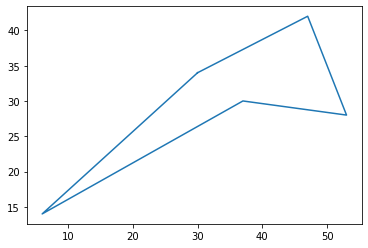

[[11, 27], [29, 25], [45, 35], [61, 26], [59, 41]]


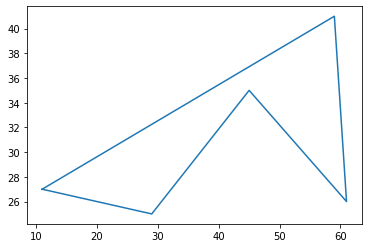

[[51, 43], [4, 21], [19, 46], [44, 47], [47, 8]]


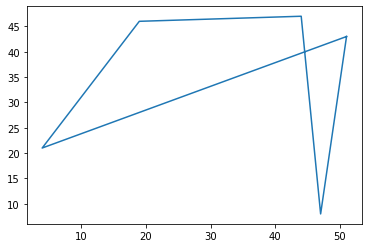

[[27, 5], [54, 18], [14, 3], [37, 44], [32, 63]]


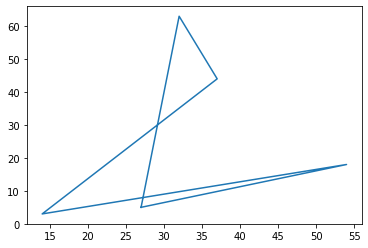

[[31, 8], [39, 63], [39, 54], [36, 51], [40, 28]]


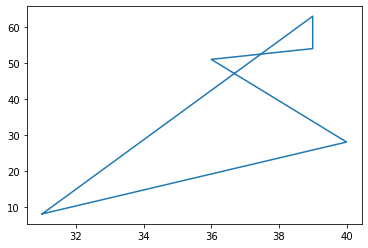

[[28, 31], [46, 63], [8, 38], [29, 50], [47, 14]]


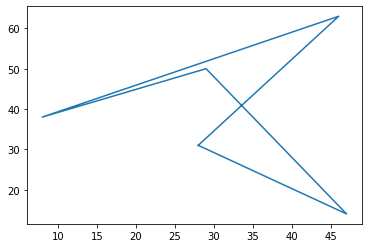

[[21, 12], [59, 62], [14, 56], [14, 11], [39, 13]]


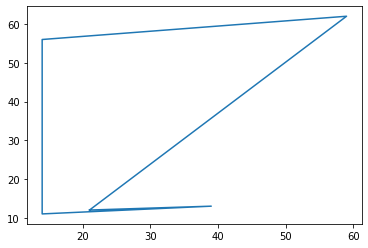

[[27, 11], [48, 52], [45, 22], [32, 33], [23, 18]]


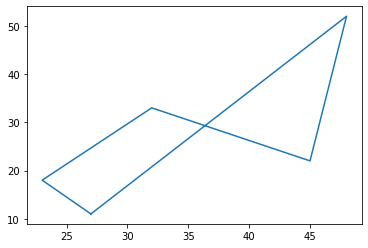

[[8, 49], [43, 36], [34, 52], [39, 60], [39, 35]]


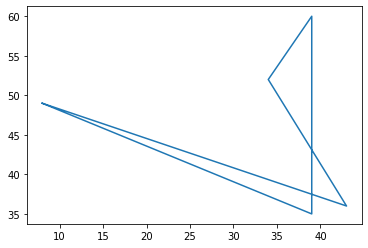

[[39, 51], [54, 30], [24, 6], [60, 1], [55, 3]]


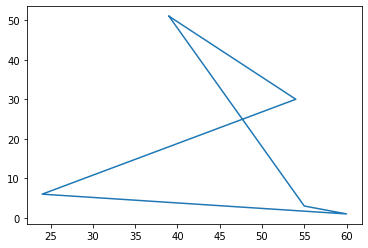

[[20, 13], [21, 18], [40, 49], [8, 62], [27, 45]]


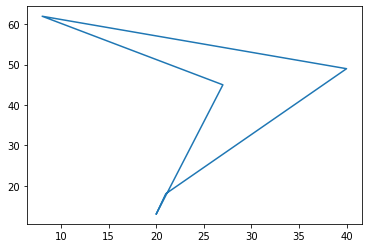

[[9, 38], [2, 2], [37, 1], [21, 46], [35, 25]]


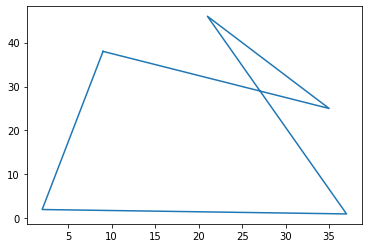

[[6, 27], [43, 29], [8, 45], [53, 59], [57, 33]]


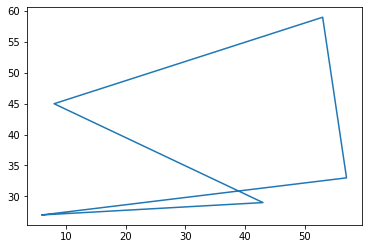

[[17, 3], [17, 25], [3, 25], [53, 43], [11, 8]]


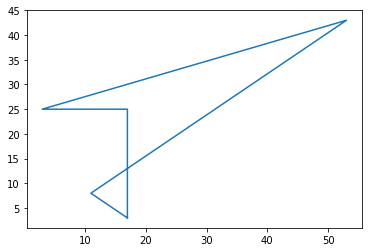

[[46, 28], [35, 57], [32, 18], [63, 60], [9, 39]]


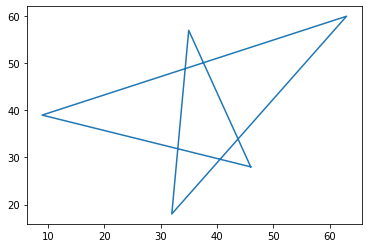

[[27, 8], [35, 46], [61, 17], [39, 7], [12, 55]]


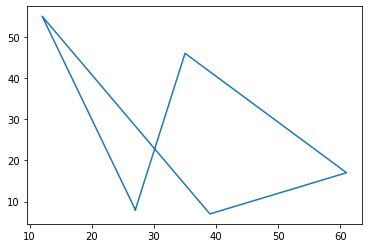

[[49, 53], [16, 62], [27, 33], [23, 38], [34, 64]]


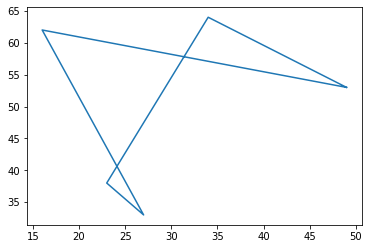

[[21, 56], [38, 31], [40, 25], [50, 62], [4, 51]]


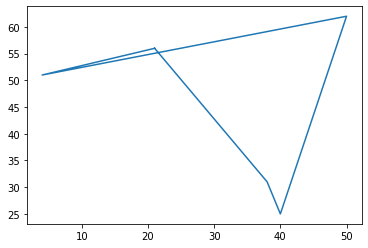

[[58, 64], [31, 44], [3, 43], [41, 13], [58, 11]]


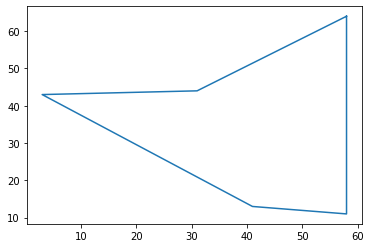

[[60, 43], [3, 47], [43, 29], [51, 15], [34, 38]]


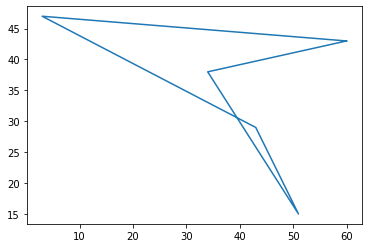

[[42, 59], [51, 51], [61, 47], [31, 54], [20, 32]]


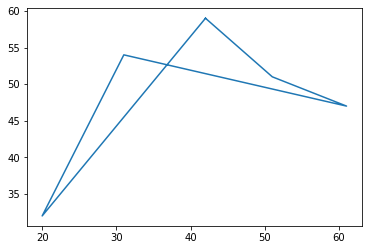

[[56, 48], [20, 59], [37, 60], [3, 25], [11, 60]]


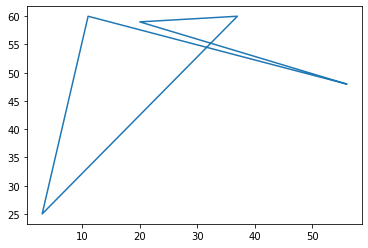

[[17, 59], [26, 58], [22, 62], [17, 22], [12, 7]]


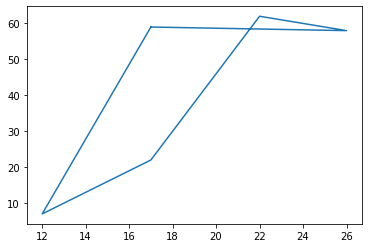

[[45, 47], [59, 39], [55, 62], [8, 18], [62, 35]]


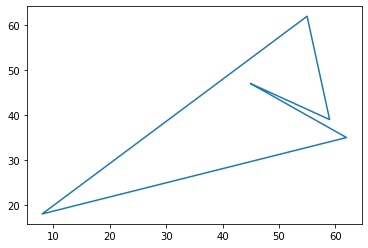

[[60, 19], [64, 63], [14, 27], [40, 58], [8, 9]]


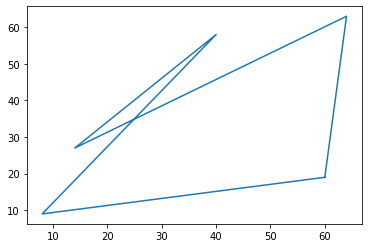

[[3, 62], [41, 20], [51, 15], [52, 49], [33, 26]]


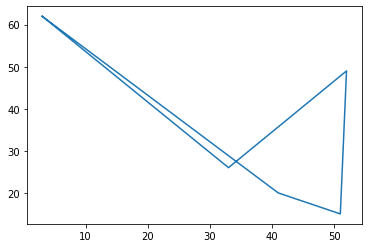

[[41, 8], [45, 23], [14, 10], [32, 2], [43, 8]]


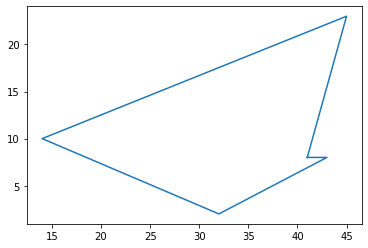

[[36, 1], [8, 6], [32, 56], [36, 27], [48, 43]]


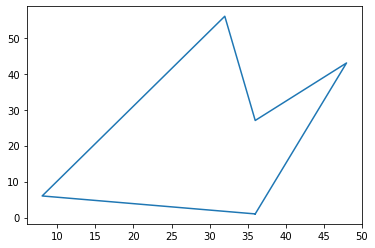

[[27, 51], [32, 47], [43, 13], [43, 4], [5, 62]]


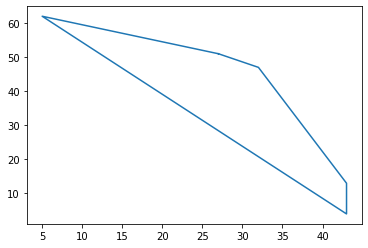

[[19, 29], [58, 59], [37, 52], [6, 56], [7, 21]]


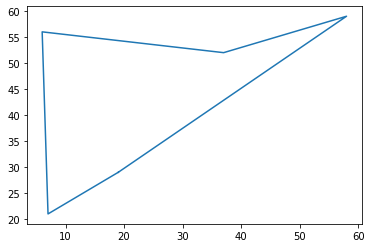

[[28, 39], [37, 50], [11, 54], [25, 46], [53, 25]]


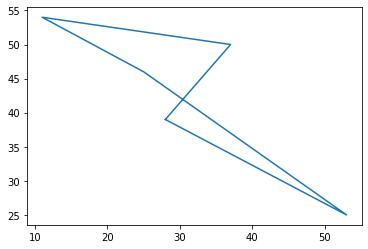

[[6, 53], [31, 53], [1, 53], [41, 63], [62, 40]]


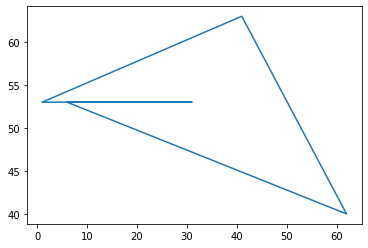

[[26, 42], [23, 59], [64, 5], [38, 7], [25, 60]]


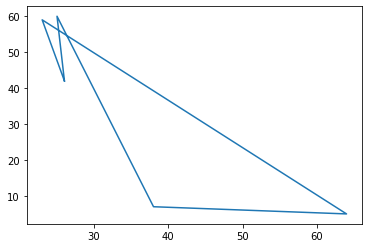

[[19, 17], [1, 44], [23, 62], [32, 50], [61, 22]]


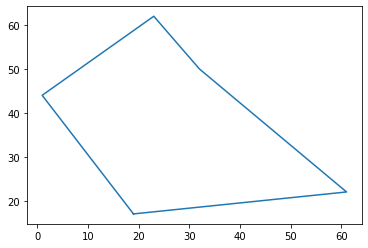

[[48, 5], [14, 46], [28, 51], [33, 12], [41, 17]]


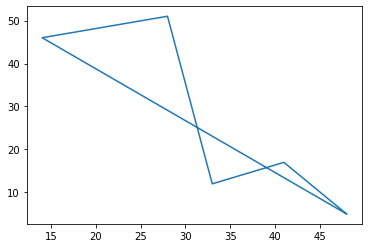

[[63, 47], [1, 26], [60, 20], [41, 7], [19, 5]]


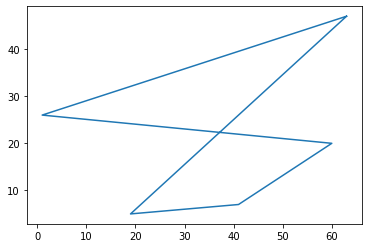

[[8, 10], [33, 14], [33, 12], [3, 5], [61, 20]]


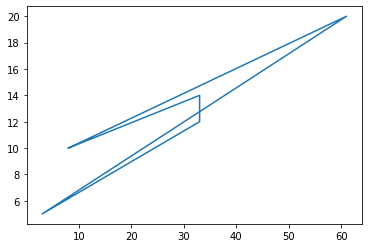

[[8, 10], [24, 25], [26, 24], [35, 15], [7, 31]]


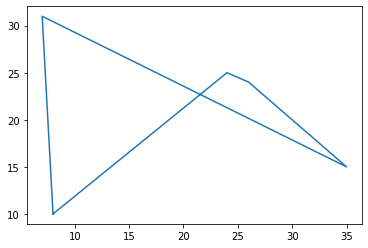

[[32, 37], [42, 48], [40, 28], [5, 23], [6, 12]]


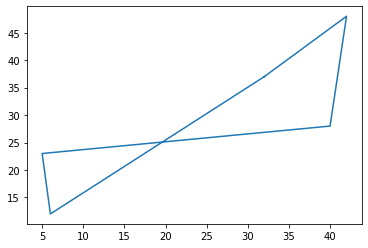

[[44, 5], [62, 45], [42, 54], [62, 52], [43, 25]]


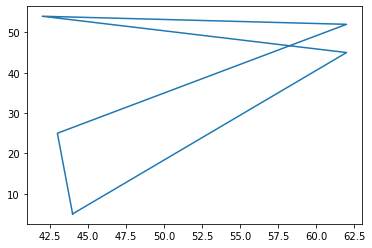

[[52, 1], [55, 30], [50, 4], [8, 23], [33, 51]]


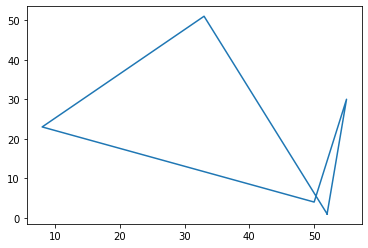

[[38, 13], [54, 25], [57, 11], [58, 49], [38, 35]]


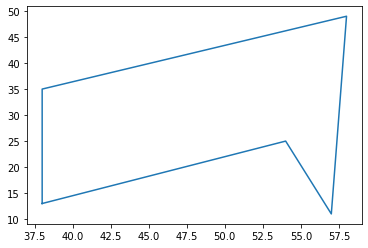

[[38, 57], [57, 50], [13, 59], [27, 13], [12, 25]]


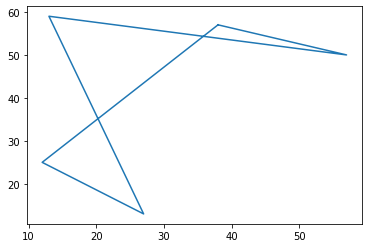

[[45, 37], [59, 20], [62, 53], [41, 5], [48, 9]]


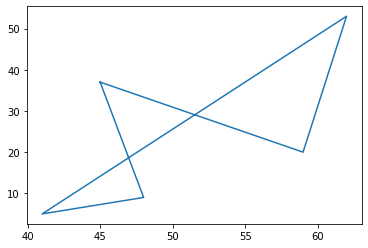

[[9, 33], [38, 29], [1, 55], [26, 51], [27, 56]]


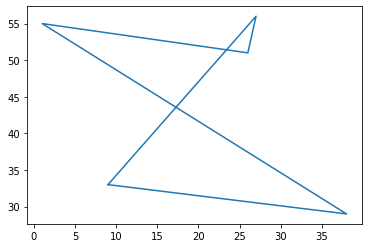

[[5, 63], [29, 42], [64, 33], [7, 11], [10, 11]]


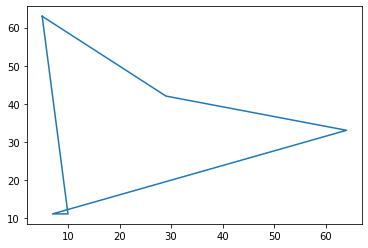

[[45, 6], [10, 44], [20, 63], [9, 61], [35, 27]]


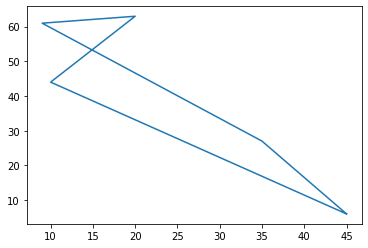

[[18, 62], [45, 11], [55, 63], [29, 47], [57, 25]]


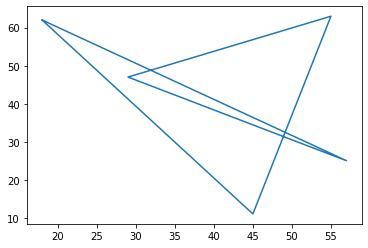

[[29, 27], [35, 25], [54, 30], [6, 42], [45, 35]]


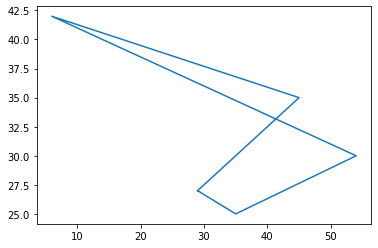

[[6, 42], [17, 19], [44, 11], [24, 6], [53, 1]]


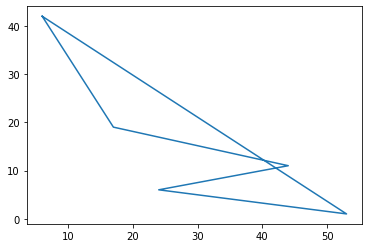

[[49, 42], [51, 55], [39, 52], [2, 22], [46, 2]]


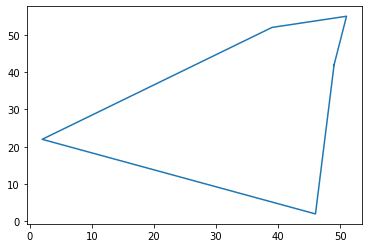

[[37, 35], [33, 59], [14, 13], [26, 35], [17, 57]]


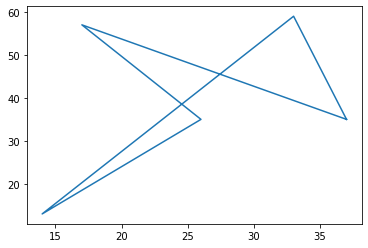

[[29, 19], [36, 35], [60, 33], [61, 23], [32, 52]]


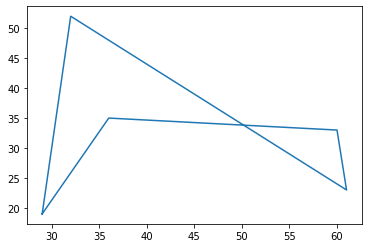

[[52, 43], [21, 59], [10, 2], [53, 54], [42, 1]]


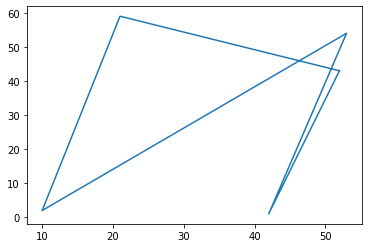

[[43, 27], [57, 2], [16, 60], [49, 4], [9, 11]]


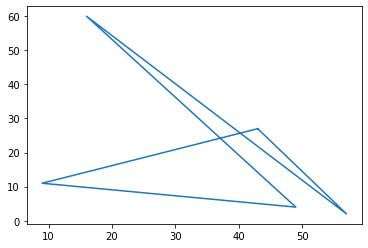

[[4, 40], [24, 41], [28, 40], [53, 26], [56, 42]]


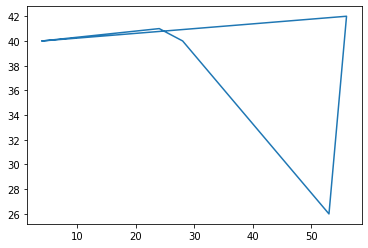

[[41, 64], [7, 23], [15, 48], [40, 50], [45, 34]]


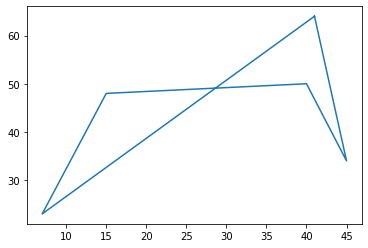

[[60, 8], [56, 15], [22, 29], [7, 58], [15, 55]]


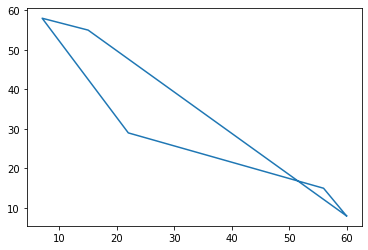

[[60, 24], [59, 34], [52, 10], [39, 16], [60, 20]]


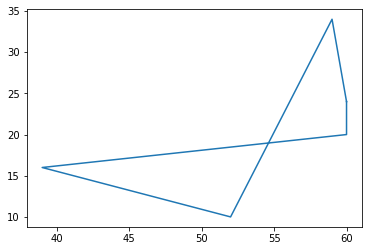

[[63, 53], [27, 59], [27, 64], [48, 41], [18, 6]]


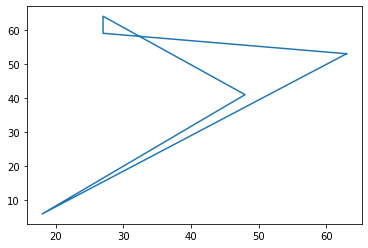

[[24, 62], [14, 36], [17, 64], [61, 48], [63, 11]]


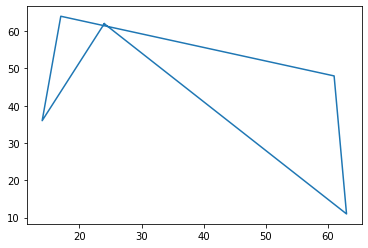

[[23, 27], [11, 51], [45, 62], [49, 16], [1, 33]]


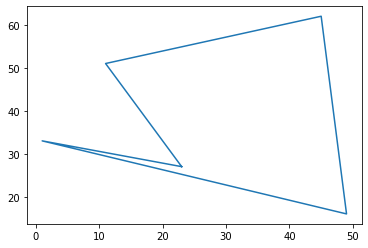

[[53, 11], [14, 51], [20, 25], [36, 10], [16, 60]]


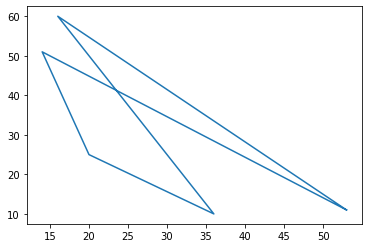

[[21, 22], [15, 26], [63, 23], [3, 5], [9, 19]]


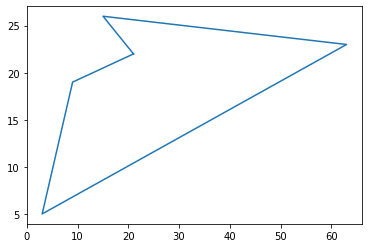

[[35, 39], [63, 58], [25, 3], [56, 44], [33, 56]]


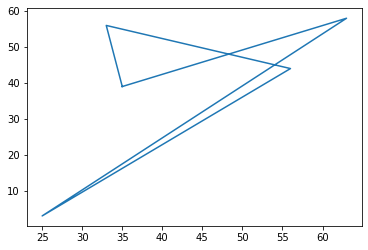

[[56, 37], [45, 53], [27, 16], [13, 37], [62, 14]]


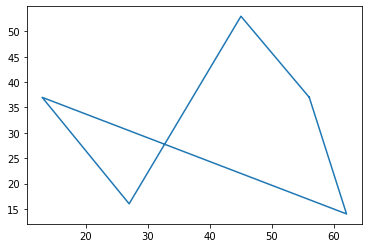

[[7, 37], [26, 57], [39, 60], [22, 51], [24, 55]]


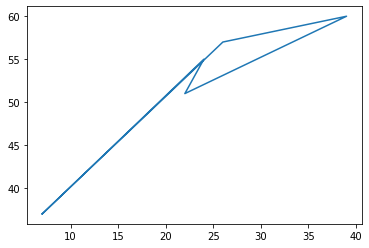

[[49, 45], [17, 38], [30, 30], [7, 11], [3, 25]]


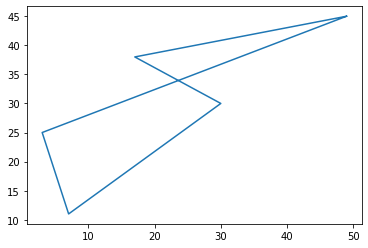

[[51, 24], [53, 15], [49, 56], [63, 30], [3, 14]]


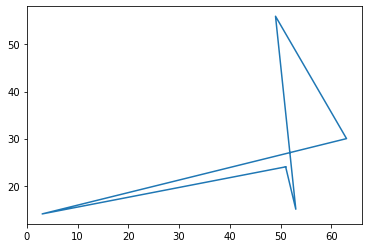

[[48, 35], [11, 17], [24, 10], [7, 1], [47, 16]]


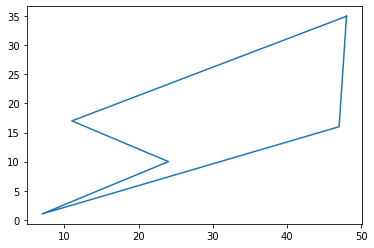

[[10, 51], [30, 40], [14, 18], [22, 22], [51, 6]]


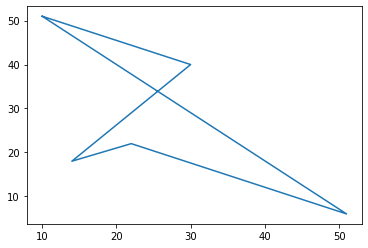

[[9, 1], [19, 21], [64, 57], [25, 48], [43, 6]]


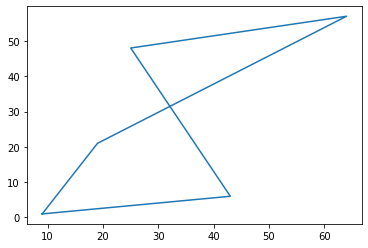

[[55, 40], [14, 9], [62, 4], [20, 51], [1, 63]]


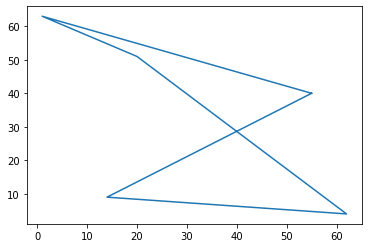

[[48, 60], [31, 24], [33, 62], [28, 31], [40, 39]]


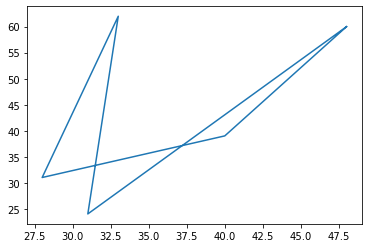

[[60, 46], [11, 10], [3, 25], [6, 50], [21, 47]]


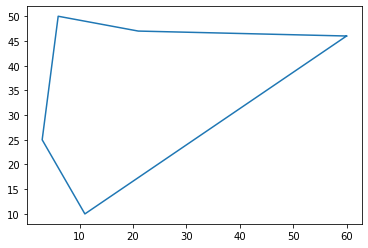

[[51, 32], [27, 64], [32, 32], [41, 59], [51, 14]]


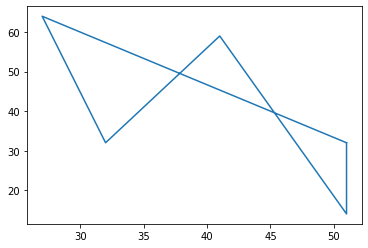

[[51, 6], [34, 59], [34, 51], [19, 36], [2, 19]]


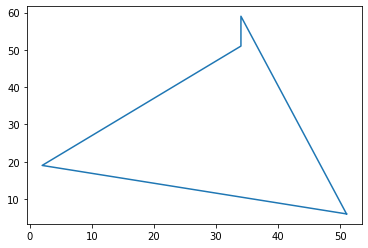

[[5, 26], [3, 5], [49, 57], [3, 47], [20, 57]]


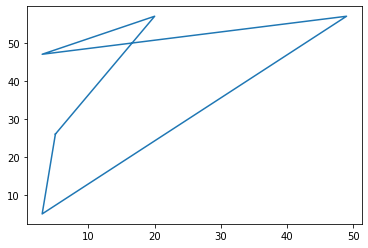

[[36, 12], [31, 48], [8, 53], [15, 46], [1, 25]]


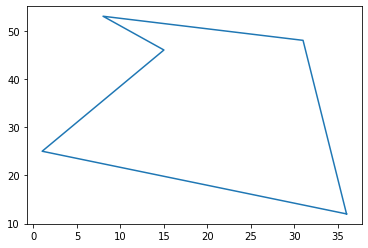

[[31, 33], [16, 11], [48, 42], [59, 36], [1, 5]]


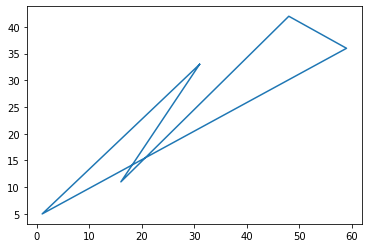

[[32, 57], [33, 55], [19, 18], [60, 56], [6, 37]]


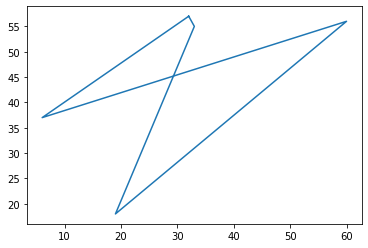

[[18, 9], [1, 64], [50, 29], [17, 9], [36, 20]]


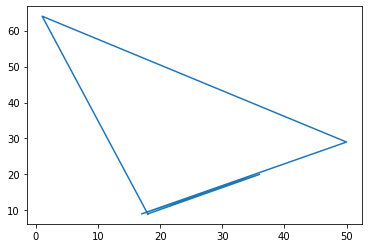

[[18, 58], [58, 6], [48, 38], [18, 60], [57, 42]]


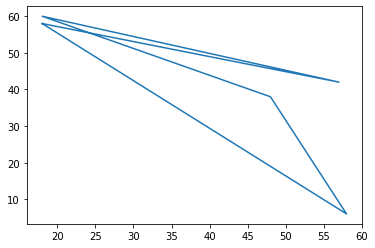

[[2, 35], [12, 36], [42, 37], [14, 53], [56, 53]]


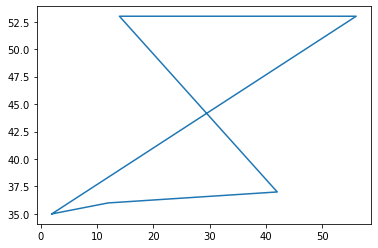

[[28, 27], [63, 64], [47, 45], [40, 55], [1, 47]]


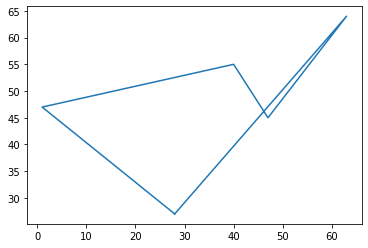

[[26, 58], [20, 54], [64, 30], [24, 31], [9, 1]]


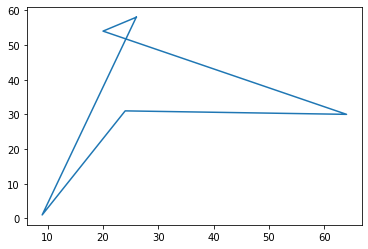

[[10, 15], [14, 39], [54, 49], [25, 28], [53, 11]]


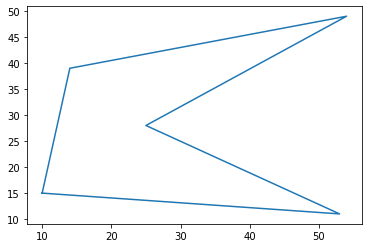

In [6]:
list1 = []
count = 0
for i in range (100):
    temp_list = []
    x = count
    y = count + 5
    while x < y:
        temp_list.append(Random_Axis[x])
        x += 1
    print(temp_list)  
    list1.append(temp_list)
    S.Draw(temp_list)  
    count += 5


[[13, 58], [37, 6], [63, 33], [13, 30], [56, 53]]
[[51, 15], [19, 15], [35, 26], [10, 51], [42, 4]]
[[25, 60], [60, 3], [41, 59], [48, 37], [12, 24]]
[[21, 35], [28, 61], [5, 38], [39, 25], [37, 39]]
[[51, 59], [61, 29], [11, 46], [2, 31], [22, 13]]
[[28, 17], [5, 18], [41, 5], [22, 5], [2, 58]]
[[37, 12], [35, 32], [19, 4], [10, 19], [61, 4]]
[[12, 59], [50, 38], [49, 9], [13, 52], [17, 17]]
[[20, 61], [61, 29], [61, 18], [4, 48], [3, 35]]
[[31, 38], [27, 50], [13, 36], [23, 13], [48, 9]]
[[55, 5], [51, 49], [52, 12], [60, 21], [47, 32]]


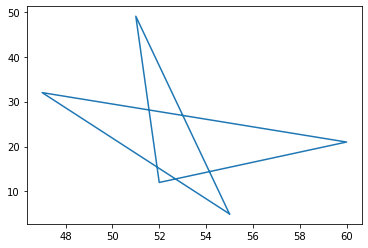

[[34, 37], [43, 45], [16, 63], [24, 12], [20, 56]]
[[60, 56], [47, 13], [61, 10], [36, 37], [39, 12]]
[[30, 34], [47, 42], [53, 28], [37, 30], [6, 14]]
[[11, 27], [29, 25], [45, 35], [61, 26], [59, 41]]
[[51, 43], [4, 21], [19, 46], [44, 47], [47, 8]]
[[27, 5], [54, 18], [14, 3], [37, 44], [32, 63]]
[[31, 8], [39, 63], [39, 54], [36, 51], [40, 28]]
[[28, 31], [46, 63], [8, 38], [29, 50], [47, 14]]
[[21, 12], [59, 62], [14, 56], [14, 11], [39, 13]]
[[27, 11], [48, 52], [45, 22], [32, 33], [23, 18]]
[[8, 49], [43, 36], [34, 52], [39, 60], [39, 35]]
[[39, 51], [54, 30], [24, 6], [60, 1], [55, 3]]
[[20, 13], [21, 18], [40, 49], [8, 62], [27, 45]]
[[9, 38], [2, 2], [37, 1], [21, 46], [35, 25]]
[[6, 27], [43, 29], [8, 45], [53, 59], [57, 33]]
[[17, 3], [17, 25], [3, 25], [53, 43], [11, 8]]
[[46, 28], [35, 57], [32, 18], [63, 60], [9, 39]]


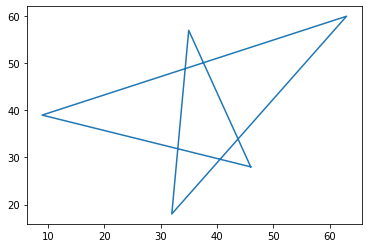

[[27, 8], [35, 46], [61, 17], [39, 7], [12, 55]]
[[49, 53], [16, 62], [27, 33], [23, 38], [34, 64]]
[[21, 56], [38, 31], [40, 25], [50, 62], [4, 51]]
[[58, 64], [31, 44], [3, 43], [41, 13], [58, 11]]
[[60, 43], [3, 47], [43, 29], [51, 15], [34, 38]]
[[42, 59], [51, 51], [61, 47], [31, 54], [20, 32]]
[[56, 48], [20, 59], [37, 60], [3, 25], [11, 60]]
[[17, 59], [26, 58], [22, 62], [17, 22], [12, 7]]
[[45, 47], [59, 39], [55, 62], [8, 18], [62, 35]]
[[60, 19], [64, 63], [14, 27], [40, 58], [8, 9]]
[[3, 62], [41, 20], [51, 15], [52, 49], [33, 26]]
[[41, 8], [45, 23], [14, 10], [32, 2], [43, 8]]
[[36, 1], [8, 6], [32, 56], [36, 27], [48, 43]]
[[27, 51], [32, 47], [43, 13], [43, 4], [5, 62]]


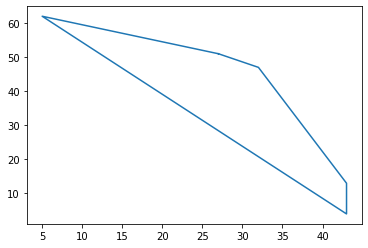

[[19, 29], [58, 59], [37, 52], [6, 56], [7, 21]]
[[28, 39], [37, 50], [11, 54], [25, 46], [53, 25]]
[[6, 53], [31, 53], [1, 53], [41, 63], [62, 40]]


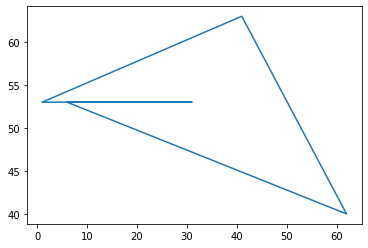

[[26, 42], [23, 59], [64, 5], [38, 7], [25, 60]]
[[19, 17], [1, 44], [23, 62], [32, 50], [61, 22]]
[[48, 5], [14, 46], [28, 51], [33, 12], [41, 17]]
[[63, 47], [1, 26], [60, 20], [41, 7], [19, 5]]
[[8, 10], [33, 14], [33, 12], [3, 5], [61, 20]]
[[8, 10], [24, 25], [26, 24], [35, 15], [7, 31]]
[[32, 37], [42, 48], [40, 28], [5, 23], [6, 12]]
[[44, 5], [62, 45], [42, 54], [62, 52], [43, 25]]
[[52, 1], [55, 30], [50, 4], [8, 23], [33, 51]]
[[38, 13], [54, 25], [57, 11], [58, 49], [38, 35]]
[[38, 57], [57, 50], [13, 59], [27, 13], [12, 25]]
[[45, 37], [59, 20], [62, 53], [41, 5], [48, 9]]
[[9, 33], [38, 29], [1, 55], [26, 51], [27, 56]]
[[5, 63], [29, 42], [64, 33], [7, 11], [10, 11]]
[[45, 6], [10, 44], [20, 63], [9, 61], [35, 27]]
[[18, 62], [45, 11], [55, 63], [29, 47], [57, 25]]


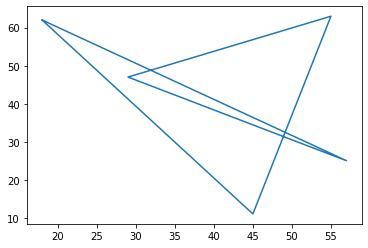

[[29, 27], [35, 25], [54, 30], [6, 42], [45, 35]]
[[6, 42], [17, 19], [44, 11], [24, 6], [53, 1]]
[[49, 42], [51, 55], [39, 52], [2, 22], [46, 2]]
[[37, 35], [33, 59], [14, 13], [26, 35], [17, 57]]
[[29, 19], [36, 35], [60, 33], [61, 23], [32, 52]]
[[52, 43], [21, 59], [10, 2], [53, 54], [42, 1]]
[[43, 27], [57, 2], [16, 60], [49, 4], [9, 11]]
[[4, 40], [24, 41], [28, 40], [53, 26], [56, 42]]
[[41, 64], [7, 23], [15, 48], [40, 50], [45, 34]]
[[60, 8], [56, 15], [22, 29], [7, 58], [15, 55]]
[[60, 24], [59, 34], [52, 10], [39, 16], [60, 20]]
[[63, 53], [27, 59], [27, 64], [48, 41], [18, 6]]
[[24, 62], [14, 36], [17, 64], [61, 48], [63, 11]]
[[23, 27], [11, 51], [45, 62], [49, 16], [1, 33]]
[[53, 11], [14, 51], [20, 25], [36, 10], [16, 60]]
[[21, 22], [15, 26], [63, 23], [3, 5], [9, 19]]
[[35, 39], [63, 58], [25, 3], [56, 44], [33, 56]]
[[56, 37], [45, 53], [27, 16], [13, 37], [62, 14]]
[[7, 37], [26, 57], [39, 60], [22, 51], [24, 55]]
[[49, 45], [17, 38], [30, 30], [7, 11], [3, 25]]
[[51

In [7]:
GA = Genetic_Algorithm()
count = 0
for i in range (100):
    temp_list = []
    x = count
    y = count + 5
    while x < y:
        temp_list.append(Random_Axis[x])
        x += 1
    print(temp_list)    
    if GA.isConvex(temp_list) == True:
        
        S.Draw(temp_list)
        count += 5
    else:    
        count += 5


In [8]:
B = Binary()
Genes = []
for x in Random_Axis:
    for y in x:
        string = []
        B.Decimal_to_Binary(y)
        str1 = ""
        for i in string:
            str1 += str(i)
        Genes.append(str1) 
        
print(Genes)   
print(len(Genes))

['1101', '111010', '100101', '110', '111111', '100001', '1101', '11110', '111000', '110101', '110011', '1111', '10011', '1111', '100011', '11010', '1010', '110011', '101010', '100', '11001', '111100', '111100', '11', '101001', '111011', '110000', '100101', '1100', '11000', '10101', '100011', '11100', '111101', '101', '100110', '100111', '11001', '100101', '100111', '110011', '111011', '111101', '11101', '1011', '101110', '10', '11111', '10110', '1101', '11100', '10001', '101', '10010', '101001', '101', '10110', '101', '10', '111010', '100101', '1100', '100011', '100000', '10011', '100', '1010', '10011', '111101', '100', '1100', '111011', '110010', '100110', '110001', '1001', '1101', '110100', '10001', '10001', '10100', '111101', '111101', '11101', '111101', '10010', '100', '110000', '11', '100011', '11111', '100110', '11011', '110010', '1101', '100100', '10111', '1101', '110000', '1001', '110111', '101', '110011', '110001', '110100', '1100', '111100', '10101', '101111', '100000', '1000

In [9]:
# Now Making Chromosomes Out of these Genes...
count = 0
for i in range (100):
    temp_list = []
    x = count
    y = count + 10
    while x < y:
        temp_list.append(Genes[x])
        x += 1
    #print(temp_list)    
    GA.Make_Chromosomes(temp_list)   
    count += 10
print("Population Generated::") 
print(len(GA.Chromosomes))
for i in GA.Chromosomes:
    print(i)

Population Generated::
100
['00011010111010', '01001010000110', '01111110100001', '00011010011110', '01110000110101']
['01100110001111', '00100110001111', '01000110011010', '00010100110011', '01010100000100']
['00110010111100', '01111000000011', '01010010111011', '01100000100101', '00011000011000']
['00101010100011', '00111000111101', '00001010100110', '01001110011001', '01001010100111']
['01100110111011', '01111010011101', '00010110101110', '00000100011111', '00101100001101']
['00111000010001', '00001010010010', '01010010000101', '00101100000101', '00000100111010']
['01001010001100', '01000110100000', '00100110000100', '00010100010011', '01111010000100']
['00011000111011', '01100100100110', '01100010001001', '00011010110100', '00100010010001']
['00101000111101', '01111010011101', '01111010010010', '00001000110000', '00000110100011']
['00111110100110', '00110110110010', '00011010100100', '00101110001101', '01100000001001']
['01101110000101', '01100110110001', '01101000001100', '0111100

In [10]:
print(list1)


for i in GA.Chromosomes:
    print(i)
    for j in i:
        print(j)
        n1 = j[:7]
        n2 = j[7:]
        p1 = int(n1, 2)
        p2 = int(n2,2)
        
        
            
                

[[[13, 58], [37, 6], [63, 33], [13, 30], [56, 53], [13, 58]], [[51, 15], [19, 15], [35, 26], [10, 51], [42, 4], [51, 15]], [[25, 60], [60, 3], [41, 59], [48, 37], [12, 24], [25, 60]], [[21, 35], [28, 61], [5, 38], [39, 25], [37, 39], [21, 35]], [[51, 59], [61, 29], [11, 46], [2, 31], [22, 13], [51, 59]], [[28, 17], [5, 18], [41, 5], [22, 5], [2, 58], [28, 17]], [[37, 12], [35, 32], [19, 4], [10, 19], [61, 4], [37, 12]], [[12, 59], [50, 38], [49, 9], [13, 52], [17, 17], [12, 59]], [[20, 61], [61, 29], [61, 18], [4, 48], [3, 35], [20, 61]], [[31, 38], [27, 50], [13, 36], [23, 13], [48, 9], [31, 38]], [[55, 5], [51, 49], [52, 12], [60, 21], [47, 32], [55, 5]], [[34, 37], [43, 45], [16, 63], [24, 12], [20, 56], [34, 37]], [[60, 56], [47, 13], [61, 10], [36, 37], [39, 12], [60, 56]], [[30, 34], [47, 42], [53, 28], [37, 30], [6, 14], [30, 34]], [[11, 27], [29, 25], [45, 35], [61, 26], [59, 41], [11, 27]], [[51, 43], [4, 21], [19, 46], [44, 47], [47, 8], [51, 43]], [[27, 5], [54, 18], [14, 3]

In [11]:
GA = Genetic_Algorithm()
for i in list1:
    GA.Fitness_Function(i)
FT ={}    
FT = GA.Get_Fitness()    
print(GA.Get_Fitness())    

LINESTRING (13 37,6 33,13 56,53 58)
LINESTRING (51 19,15 26,10 42,4 15)
LINESTRING (25 60,3 59,48 12,24 60)
LINESTRING (25 60,3 59,48 12,24 60)
LINESTRING (21 28,61 38,39 37,39 35)
LINESTRING (51 61,29 46,2 22,13 59)
LINESTRING (28 5,18 5,22 2,58 17)
LINESTRING (37 35,32 4,10 61,4 12)
LINESTRING (37 35,32 4,10 61,4 12)
LINESTRING (12 50,38 9,13 17,17 59)
LINESTRING (12 50,38 9,13 17,17 59)
LINESTRING (20 61,29 18,4 3,35 61)
LINESTRING (20 61,29 18,4 3,35 61)
LINESTRING (31 27,50 36,23 48,9 38)
LINESTRING (55 51,49 12,60 47,32 5)
LINESTRING (55 51,49 12,60 47,32 5)
LINESTRING (34 43,45 63,24 20,56 37)
LINESTRING (34 43,45 63,24 20,56 37)
LINESTRING (60 47,13 10,36 39,12 56)
LINESTRING (30 47,42 28,37 6,14 34)
LINESTRING (11 29,25 35,61 59,41 27)
LINESTRING (51 4,21 46,44 47,8 43)
LINESTRING (51 4,21 46,44 47,8 43)
LINESTRING (27 54,18 3,37 32,63 5)
LINESTRING (31 39,63 54,36 40,28 8)
LINESTRING (28 46,63 38,29 47,14 31)
LINESTRING (28 46,63 38,29 47,14 31)
LINESTRING (21 59,62 56,14 39,

In [12]:
Ch = GA.Get_Chromosomes()
c1 = 0
c2 = 1
counter_loop = 0
while counter_loop != 50:
    GA.CrossOver(Ch[c1],Ch[c2])
    counter_loop += 1
    c1+=2
    c2+=2
Ch = GA.Get_Chromosomes()
print("Cross-Over Genes Created:")
for i in Ch:
    print(i)
print(len(Ch))  

Cross-Over Genes Created:
['00100110001111', '01100110001111', '01111110100001', '01010100000100', '00010100110011']
['01001010000110', '00011010111010', '01000110011010', '01110000110101', '00011010011110']
['00111000111101', '00101010100011', '01010010111011', '01001010100111', '01001110011001']
['01111000000011', '00110010111100', '00001010100110', '00011000011000', '01100000100101']
['00001010010010', '00111000010001', '00010110101110', '00000100111010', '00101100000101']
['01111010011101', '01100110111011', '01010010000101', '00101100001101', '00000100011111']
['01100100100110', '00011000111011', '00100110000100', '00100010010001', '00011010110100']
['01000110100000', '01001010001100', '01100010001001', '01111010000100', '00010100010011']
['00110110110010', '00111110100110', '01111010010010', '01100000001001', '00101110001101']
['01111010011101', '00101000111101', '00011010100100', '00000110100011', '00001000110000']
['01010110101101', '01000100100101', '01101000001100', '00101000

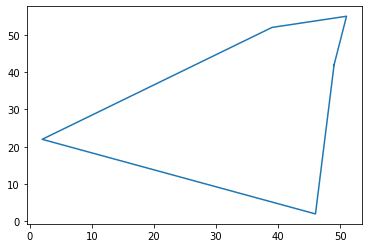

In [13]:
for i,j in FT:
        n = i
        break
obj= Shape(5)      
obj.Draw(list1[n])      
        